<a href="https://colab.research.google.com/github/Dhivya-kuppusamy/CODSOFT/blob/main/credit_card_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/fraudTest.csv", encoding='ISO-8859-1')

In [ ]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550330,550330,2020-12-30 09:47:59,4198470814557,"fraud_Kerluke, Kertzmann and Wiza",misc_net,8.36,Christie,Williamson,F,519 Jerry Views,...,41.4768,-95.3509,2036,Engineering geologist,1971-08-20,1df838d07bb6a2f2ccc9f7cfa742df6c,1.388397e+09,41.164894,-94.700402,0.0
550331,550331,2020-12-30 09:49:10,4063094974360571498,fraud_McGlynn-Jaskolski,misc_pos,9.45,Patricia,Mendoza,F,1683 Davidson Freeway,...,41.7100,-111.9817,2078,"Scientist, audiological",1963-06-13,46decb5bc0ec275b6a86f20ec5444d3b,1.388397e+09,41.922859,-111.538063,0.0
550332,550332,2020-12-30 09:49:35,6011504998544485,fraud_Lockman Ltd,grocery_pos,124.23,Ashley,Whitney,F,4038 Smith Avenue,...,32.5104,-86.8138,1089,Materials engineer,1971-11-02,aef8e578a8e021205c7c5ef367dabf2d,1.388397e+09,31.597095,-87.349883,0.0
550333,550333,2020-12-30 09:50:33,344342339068828,fraud_Torp-Labadie,gas_transport,70.02,Ruth,Fuller,F,37732 Joe Courts Apt. 752,...,31.3826,-81.4312,5989,Tax adviser,1967-05-05,38876a575fd79c426691c0b1c0bcd50a,1.388397e+09,30.944205,-80.773733,0.0


In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550335 entries, 0 to 550334
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             550335 non-null  int64  
 1   trans_date_trans_time  550335 non-null  object 
 2   cc_num                 550335 non-null  int64  
 3   merchant               550335 non-null  object 
 4   category               550335 non-null  object 
 5   amt                    550335 non-null  float64
 6   first                  550335 non-null  object 
 7   last                   550335 non-null  object 
 8   gender                 550335 non-null  object 
 9   street                 550335 non-null  object 
 10  city                   550335 non-null  object 
 11  state                  550335 non-null  object 
 12  zip                    550335 non-null  int64  
 13  lat                    550335 non-null  float64
 14  long                   550335 non-nu

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
# Example imputation for numeric columns
data['city_pop'].fillna(data['city_pop'].median(), inplace=True)
data['unix_time'].fillna(data['unix_time'].median(), inplace=True)
data['merch_lat'].fillna(data['merch_lat'].median(), inplace=True)
data['merch_long'].fillna(data['merch_long'].median(), inplace=True)
data['is_fraud'].fillna(0, inplace=True)  # Assuming is_fraud is a binary variable


In [ ]:
data.dropna(subset=['unix_time', 'merch_lat', 'merch_long', 'is_fraud'], inplace=True)


In [ ]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,550335.000000,5.503350e+05,550335.000000,550335.000000,550335.000000,550335.000000,5.503350e+05,5.503350e+05,550335.000000,550335.000000,550335.000000
mean,275167.000000,4.176801e+17,69.439896,48839.288488,38.543865,-90.230139,8.821468e+04,1.380603e+09,38.543388,-90.230175,0.003898
std,158868.174535,1.309593e+18,157.029517,26856.645341,5.061211,13.723075,3.004267e+05,5.168794e+06,5.095668,13.734422,0.062309
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,1.200000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,137583.500000,1.800429e+14,9.630000,26237.000000,34.668900,-96.798000,7.410000e+02,1.375989e+09,34.756162,-96.903064,0.000000
50%,275167.000000,3.521417e+15,47.340000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380641e+09,39.377328,-87.444415,0.000000
75%,412750.500000,4.635331e+15,83.050000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385819e+09,41.954256,-80.262389,0.000000
max,550334.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388397e+09,66.679297,-66.952026,1.000000


In [ ]:
X = data.drop('is_fraud', axis=1)  # Assuming 'is_fraud' is the target variable
y = data['is_fraud']

In [ ]:
data['Unnamed: 0'],unnamed_name=pd.factorize(data['Unnamed: 0'])
print(unnamed_name)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            550325, 550326, 550327, 550328, 550329, 550330, 550331, 550332,
            550333, 550334],
           dtype='int64', length=550335)


In [ ]:
data['cc_num'],cc_name=pd.factorize(data['cc_num'])
print(cc_name)


Int64Index([2291163933867244, 3573030041201292, 3598215285024754,
            3591919803438423, 3526826139003047,   30407675418785,
             213180742685905, 3589289942931264, 3596357274378601,
            3546897637165774,
            ...
            3550412175018089,     586100864972,  372965408103277,
             180020605265701,  347399333635231,    4883407061576,
               4295296907373, 4087542780207162, 3588001568691267,
            2242176657877538],
           dtype='int64', length=924)


In [ ]:
data['category'],category_name=pd.factorize(data['category'])
print(category_name)


Index(['personal_care', 'health_fitness', 'misc_pos', 'travel', 'kids_pets',
       'shopping_pos', 'food_dining', 'home', 'entertainment', 'shopping_net',
       'misc_net', 'grocery_pos', 'gas_transport', 'grocery_net'],
      dtype='object')


In [ ]:
data['trans_date_trans_time'],time_name=pd.factorize(data['trans_date_trans_time'])
print(time_name)


Index(['2020-06-21 12:14:25', '2020-06-21 12:14:33', '2020-06-21 12:14:53',
       '2020-06-21 12:15:15', '2020-06-21 12:15:17', '2020-06-21 12:15:37',
       '2020-06-21 12:15:44', '2020-06-21 12:15:50', '2020-06-21 12:16:10',
       '2020-06-21 12:16:11',
       ...
       '2020-12-30 09:47:07', '2020-12-30 09:47:18', '2020-12-30 09:47:32',
       '2020-12-30 09:47:39', '2020-12-30 09:47:52', '2020-12-30 09:47:59',
       '2020-12-30 09:49:10', '2020-12-30 09:49:35', '2020-12-30 09:50:33',
       '2020-12-30 09:51:29'],
      dtype='object', length=539486)


In [ ]:
data['amt'],amt_name=pd.factorize(data['amt'])
print(amt_name)

Float64Index([   2.86,   29.84,   41.28,   60.05,    3.19,   19.55,  133.93,
                10.37,    4.37,   66.54,
              ...
               418.48,  278.51, 1095.43,  231.91,  423.06,  270.61,  238.97,
               302.69,  721.02,  294.96],
             dtype='float64', length=37140)


In [ ]:
data['merchant'],merchant_name=pd.factorize(data['merchant'])
print(merchant_name)

Index(['fraud_Kirlin and Sons', 'fraud_Sporer-Keebler',
       'fraud_Swaniawski, Nitzsche and Welch', 'fraud_Haley Group',
       'fraud_Johnston-Casper', 'fraud_Daugherty LLC', 'fraud_Romaguera Ltd',
       'fraud_Reichel LLC', 'fraud_Goyette, Howell and Collier',
       'fraud_Kilback Group',
       ...
       'fraud_Rippin, Kub and Mann', 'fraud_Rempel PLC',
       'fraud_Leannon-Nikolaus', 'fraud_Monahan, Hermann and Johns',
       'fraud_Block-Hauck', 'fraud_Hagenes, Hermann and Stroman',
       'fraud_Hermann-Gaylord', 'fraud_Mante Group', 'fraud_Corwin-Gorczany',
       'fraud_McCullough Group'],
      dtype='object', length=693)


In [ ]:
data['zip'],zip_name=pd.factorize(data['zip'])
print(zip_name)

Int64Index([29209, 84002, 11710, 32780, 49632, 14816, 95528, 57374, 16858,
            76678,
            ...
            40502, 13795, 87417, 66958, 65745, 98118, 52658, 73044, 99921,
            38668],
           dtype='int64', length=912)


In [ ]:
data['lat'],lat_name=pd.factorize(data['lat'])
print(lat_name)

Float64Index([33.9659, 40.3207, 40.6729, 28.5697, 44.2529, 42.1939,  40.507,
              43.7557, 41.0001, 31.6591,
              ...
              38.0174, 42.0695,  36.741, 39.8616, 36.5276, 47.5412, 40.7067,
               35.833, 55.4732, 34.6323],
             dtype='float64', length=910)


In [ ]:
data['long'],long_name=pd.factorize(data['long'])
print(long_name)

Float64Index([          -80.9355,           -110.436,           -73.5365,
                        -80.8191, -85.01700000000001,           -76.7361,
                       -123.9743,           -97.5936,           -78.2357,
                        -96.8094,
              ...
                        -84.4854,           -75.7967,           -108.351,
                        -97.1825,           -93.9359,           -122.275,
                        -91.2268,            -97.436,          -133.1171,
                        -89.8855],
             dtype='float64', length=910)


In [ ]:
data['city_pop'],city_name=pd.factorize(data['city_pop'])
print(city_name)

Int64Index([333497,    302,  34496,  54767,   1126,    520,   1139,    343,
              3688,    263,
            ...
              3800,   6910,    314,   2693, 837792,   1071,  20226,   1920,
             14462,     12],
           dtype='int64', length=836)


In [ ]:
data['unix_time'],unix_name=pd.factorize(data['unix_time'])
print(unix_name)

Float64Index([1371816865.0, 1371816873.0, 1371816893.0, 1371816915.0,
              1371816917.0, 1371816937.0, 1371816944.0, 1371816950.0,
              1371816970.0, 1371816971.0,
              ...
              1388396827.0, 1388396838.0, 1388396852.0, 1388396859.0,
              1388396872.0, 1388396879.0, 1388396950.0, 1388396975.0,
              1388397033.0, 1380640881.5],
             dtype='float64', length=539486)


In [ ]:
data['merch_lat'],merch_name=pd.factorize(data['merch_lat'])
print(merch_name)

Float64Index([33.986391, 39.450498,  40.49581, 28.812398, 44.959148, 41.747157,
              41.499458, 44.495498, 41.546067, 31.782919,
              ...
              36.946237, 33.547286, 42.842149, 35.391819, 37.936643, 41.164894,
              41.922859, 31.597095, 30.944205, 39.377328],
             dtype='float64', length=541270)


In [ ]:
data['merch_long'],long_name=pd.factorize(data['merch_long'])
print(long_name)

Float64Index([        -81.200714,        -109.960431,         -74.196111,
                      -80.883061,         -85.884734,         -77.584197,
                     -124.888729,         -97.728453,         -78.120238,
                      -96.366185,
              ...
                     -120.217838,         -91.721718,         -95.022351,
                      -96.386329,         -85.914573,         -94.700402,
                     -111.538063, -87.34988299999999,         -80.773733,
              -87.44441549999999],
             dtype='float64', length=546468)


In [ ]:
data['is_fraud'],fraud_name=pd.factorize(data['is_fraud'])
print(fraud_name)

Float64Index([0.0, 1.0], dtype='float64')


In [ ]:
data['first'],first_name=pd.factorize(data['first'])
print(first_name)

Index(['Jeff', 'Joanne', 'Ashley', 'Brian', 'Nathan', 'Danielle', 'Kayla',
       'Paula', 'David', 'Samuel',
       ...
       'Katelyn', 'Wesley', 'Sonya', 'Collin', 'Tommy', 'Guy', 'Dennis',
       'Bruce', 'Evan', 'Nicole'],
      dtype='object', length=341)


In [ ]:
data['last'],last_name=pd.factorize(data['last'])
print(last_name)

Index(['Elliott', 'Williams', 'Lopez', 'Massey', 'Evans', 'Sutton', 'Estrada',
       'Everett', 'Obrien', 'Jenkins',
       ...
       'Bridges', 'Raymond', 'Davidson', 'Osborne', 'Webster', 'Freeman',
       'Bartlett', 'Santiago', 'Bates', 'Robbins'],
      dtype='object', length=471)


In [ ]:
data['street'],street_name=pd.factorize(data['street'])
print(street_name)

Index(['351 Darlene Green', '3638 Marsh Union', '9333 Valentine Point',
       '32941 Krystal Mill Apt. 552', '5783 Evan Roads Apt. 465',
       '76752 David Lodge Apt. 064', '010 Weaver Land', '350 Stacy Glens',
       '4138 David Fall', '7921 Robert Port Suite 343',
       ...
       '742 Sellers Ferry', '4481 Maldonado Hollow',
       '53199 Laurie Mills Apt. 864', '7908 Derrick Mount',
       '13128 Hall Station Suite 588', '6386 Bailey Hill Apt. 421',
       '007 Tonya Isle Suite 299', '537 Brian Island', '5942 Thomas Park',
       '1327 Rose Causeway Apt. 610'],
      dtype='object', length=924)


In [ ]:
data['job'],job_name=pd.factorize(data['job'])
print(job_name)

Index(['Mechanical engineer', 'Sales professional, IT', 'Librarian, public',
       'Set designer', 'Furniture designer', 'Psychotherapist',
       'Therapist, occupational', 'Development worker, international aid',
       'Advice worker', 'Barrister',
       ...
       'Medical technical officer', 'Charity officer', 'Administrator, arts',
       'Occupational therapist', 'Solicitor, Scotland', 'Sports administrator',
       'Artist', 'Engineer, water', 'Operational investment banker',
       'Software engineer'],
      dtype='object', length=478)


In [ ]:
data['dob'],dob_name=pd.factorize(data['dob'])
print(dob_name)

Index(['1968-03-19', '1990-01-17', '1970-10-21', '1987-07-25', '1955-07-06',
       '1991-10-13', '1951-01-15', '1972-03-05', '1973-05-27', '1956-05-30',
       ...
       '1962-12-30', '1968-07-06', '1956-02-02', '2002-03-17', '1968-02-05',
       '1936-12-23', '1998-08-02', '1969-11-08', '1997-06-17', '1959-03-03'],
      dtype='object', length=910)


In [ ]:
data['trans_num'],trans_name=pd.factorize(data['trans_num'])
print(trans_name)

Index(['2da90c7d74bd46a0caf3777415b3ebd3', '324cc204407e99f51b0d6ca0055005e7',
       'c81755dbbbea9d5c77f094348a7579be', '2159175b9efe66dc301f149d3d5abf8c',
       '57ff021bd3f328f8738bb535c302a31b', '798db04aaceb4febd084f1a7c404da93',
       '17003d7ce534440eadb10c4750e020e5', '8be473af4f05fc6146ea55ace73e7ca2',
       '71a1da150d1ce510193d7622e08e784e', 'a7915132c7c4240996ba03a47f81e3bd',
       ...
       '57d2782116e4d73e3e8d74495b641309', 'a9bcbbbea8b37bd6c630a5d9e7691d13',
       '51275787a0b8be3f270b3545b2a36b64', '06b9a150bb66bfda105f1e7fc2af0882',
       '881b48c568135ce21a43fb09c11aaa64', '64600dfae7d70afa5efd242c889f69f1',
       '1df838d07bb6a2f2ccc9f7cfa742df6c', '46decb5bc0ec275b6a86f20ec5444d3b',
       'aef8e578a8e021205c7c5ef367dabf2d', '38876a575fd79c426691c0b1c0bcd50a'],
      dtype='object', length=550334)


In [ ]:
data['gender'],gender_name=pd.factorize(data['gender'])
print(gender_name)

Index(['M', 'F'], dtype='object')


In [ ]:
data['city'],city_name=pd.factorize(data['city'])
print(city_name)

Index(['Columbia', 'Altonah', 'Bellmore', 'Titusville', 'Falmouth',
       'Breesport', 'Carlotta', 'Spencer', 'Morrisdale', 'Prairie Hill',
       ...
       'Lexington', 'Kirkwood', 'Kirtland', 'Morrowville', 'Seligman',
       'Seattle', 'Wever', 'Guthrie', 'Craig', 'Senatobia'],
      dtype='object', length=849)


In [ ]:
data['state'],state_name=pd.factorize(data['state'])
print(state_name)

Index(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY', 'AL',
       'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD', 'MS', 'KS',
       'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK', 'WA', 'WV', 'NM',
       'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH', 'ND', 'CT', 'NV', 'HI',
       'RI', 'AK'],
      dtype='object')


In [ ]:

x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
feature_importances = dtree.feature_importances_

In [ ]:
feature_names = x.columns

In [ ]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,2,2,2,2,1,2,2,2,1,2,...,2,2,2,2,2,2,2,2,2,0
3,3,3,3,3,2,3,3,1,0,3,...,3,3,3,3,3,3,3,3,3,0
4,4,4,4,4,3,4,4,3,0,4,...,4,4,4,4,4,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550330,550330,539481,503,672,10,1609,251,312,1,503,...,499,498,473,340,494,550330,539481,541265,546463,0
550331,550331,539482,158,363,2,1612,115,69,1,158,...,157,157,156,50,158,550331,539482,541266,546464,0
550332,550332,539483,14,550,11,22431,2,13,1,14,...,14,14,14,14,14,550332,539483,541267,546465,0
550333,550333,539484,534,570,12,11948,264,136,1,534,...,530,529,503,186,524,550333,539484,541268,546466,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550335 entries, 0 to 550334
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Unnamed: 0             550335 non-null  int64
 1   trans_date_trans_time  550335 non-null  int64
 2   cc_num                 550335 non-null  int64
 3   merchant               550335 non-null  int64
 4   category               550335 non-null  int64
 5   amt                    550335 non-null  int64
 6   first                  550335 non-null  int64
 7   last                   550335 non-null  int64
 8   gender                 550335 non-null  int64
 9   street                 550335 non-null  int64
 10  city                   550335 non-null  int64
 11  state                  550335 non-null  int64
 12  zip                    550335 non-null  int64
 13  lat                    550335 non-null  int64
 14  long                   550335 non-null  int64
 15  city_pop         

In [ ]:
from sklearn import tree, metrics
dtree=tree.DecisionTreeClassifier(criterion='gini')#entrophy or gini
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
classification_rep = classification_report(y_test, y_pred)

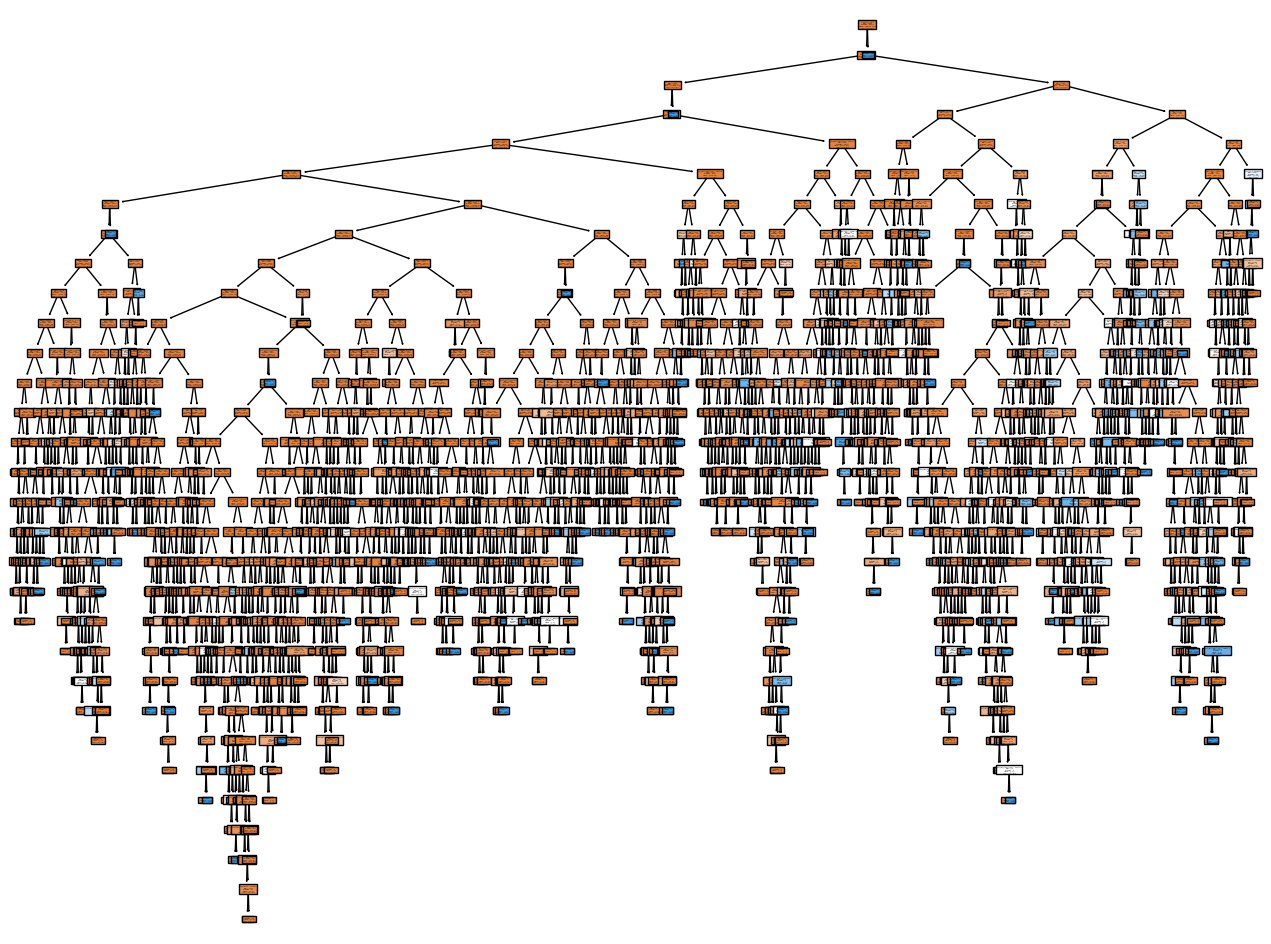

In [ ]:
plt.figure(figsize=(16, 12))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'])
plt.show()

In [ ]:
print("Decision Tree Model:")
print("Accuracy:", accuracy)

Decision Tree Model:
Accuracy: 0.996541510953901


In [ ]:
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    164446
           1       0.56      0.62      0.59       655

    accuracy                           1.00    165101
   macro avg       0.78      0.81      0.79    165101
weighted avg       1.00      1.00      1.00    165101



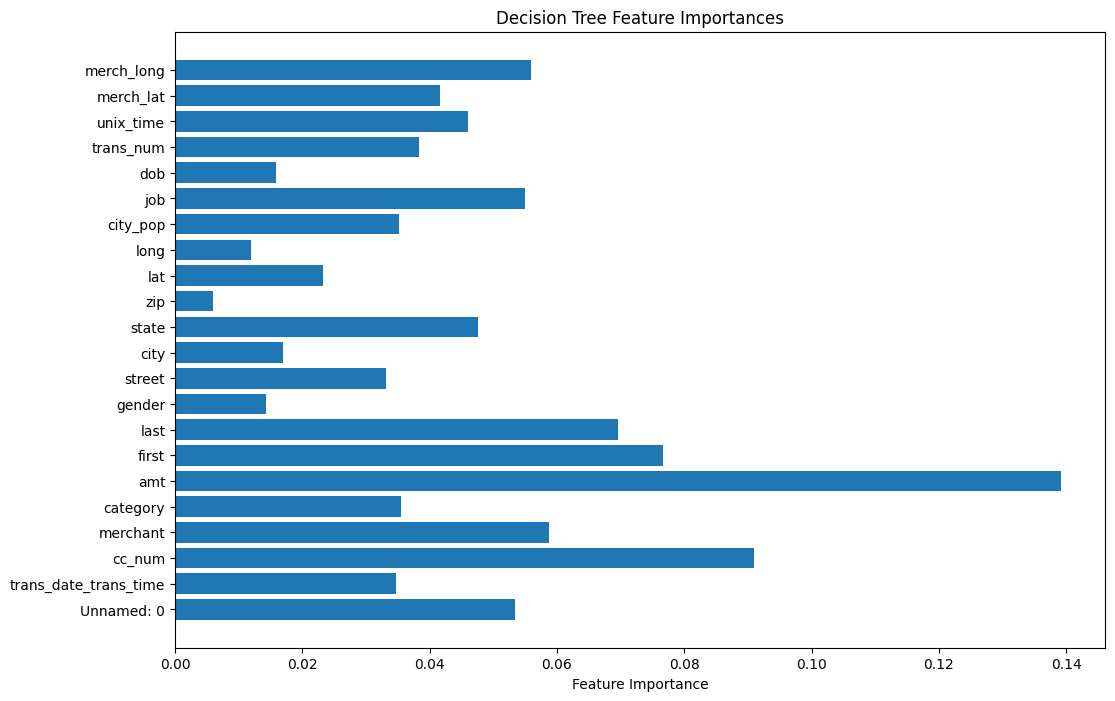

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

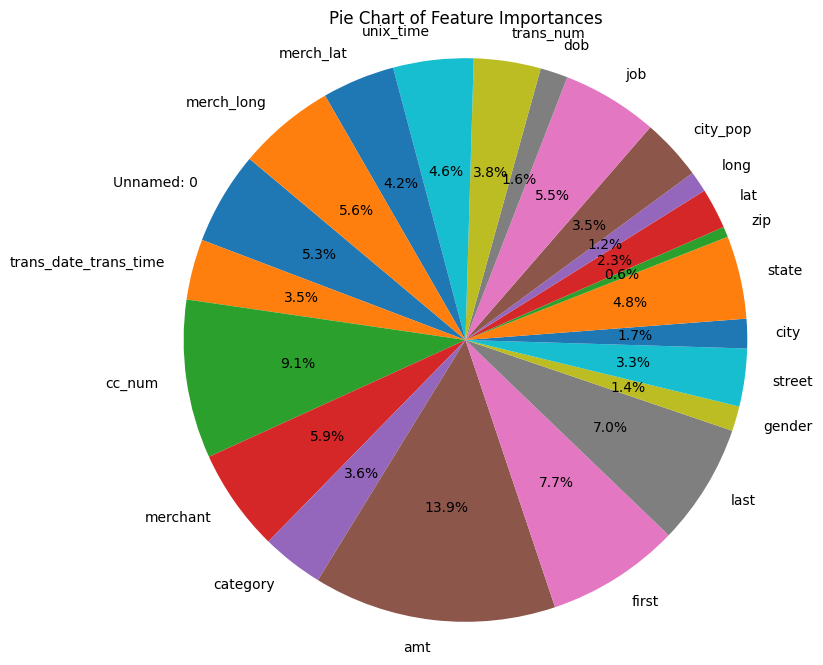

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(feature_importances, labels=feature_names, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Feature Importances')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

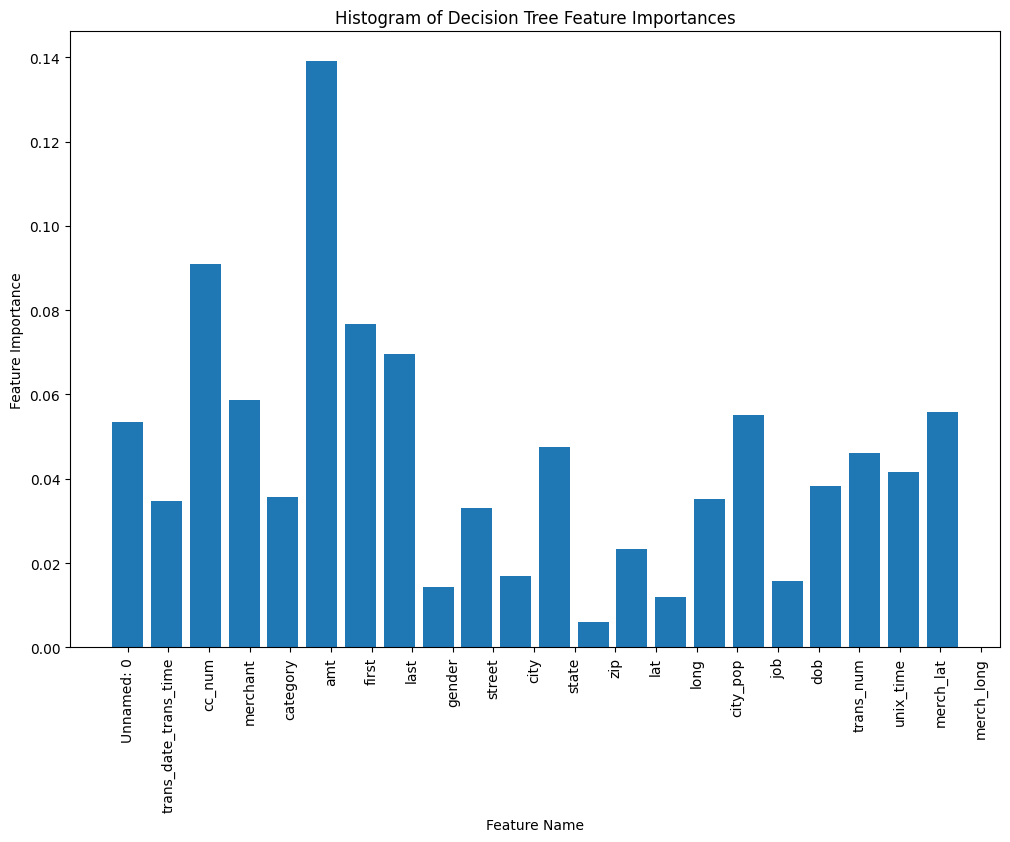

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(range(len(feature_importances)), bins=len(feature_importances), weights=feature_importances, align='left', rwidth=0.8)
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Histogram of Decision Tree Feature Importances')
plt.show()